## Observations and Insights 

In [101]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and display preview
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [3]:
# Read study results and display preview
study_results = pd.read_csv(study_results_path)
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
combine_data.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [5]:
# Checking the number of mice.
mice_count = combine_data['Mouse ID'].value_counts()
mice_count

g989    13
u364    10
i334    10
e584    10
t565    10
        ..
n482     1
d133     1
x226     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [79]:
total_mice = len(combine_data['Mouse ID'].unique())
print(f"The total mice count is: {total_mice}")

The total mice count is: 249


In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_group = combine_data.groupby(['Mouse ID', 'Timepoint'])
mice_group.nunique()

Mouse ID  Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                                        
a203     0                 1             1    1           1           1   
         5                 1             1    1           1           1   
         10                1             1    1           1           1   
         15                1             1    1           1           1   
         20                1             1    1           1           1   
...                      ...           ...  ...         ...         ...   
z969     25                1             1    1           1           1   
         30                1             1    1           1           1   
         35                1             1    1           1           1   
         40                1             1    1           1           1   
         45                1             1    1           1           1   

                    Timepoint  Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                                   
a203     0                  1                   1                 1  
         5                  1                   1                 1  
         10                 1                   1                 1  
         15                 1                   1                 1  
         20                 1                   1                 1  
...                       ...                 ...               ...  
z969     25                 1                   1                 1  
         30                 1                   1                 1  
         35                 1                   1                 1  
         40                 1                   1                 1  
         45                 1                   1                 1  

[1888 rows x 8 columns]

In [83]:
# Before beginning the analysis, check the data for any mouse ID with duplicate time points 
  # and remove any data associated with that mouse ID
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = combine_data.loc[combine_data['Mouse ID'] =='g989', :]
g989_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data.loc[combine_data['Mouse ID'] != 'g989', :]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the clean DataFrame.
total_mice2 = len(clean_data['Mouse ID'].unique())            
print(f"After removing a duplicate and cleaning the DataFrame, the total number of mice is: {total_mice2}")


After removing a duplicate and cleaning the DataFrame, the total number of mice is: 248


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
count = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].count()
mean = combine_data.groupby("Drug Regimen") ['Tumor Volume (mm3)'].mean()
median = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
variance = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()
stdv = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
sem = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Count': count, 'Mean': mean, 'Median': median, 'Variane': variance,
                                   'Standard Deviation': stdv, 'SEM': sem})
summary_statistics

,Count,Mean,Median,Variane,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

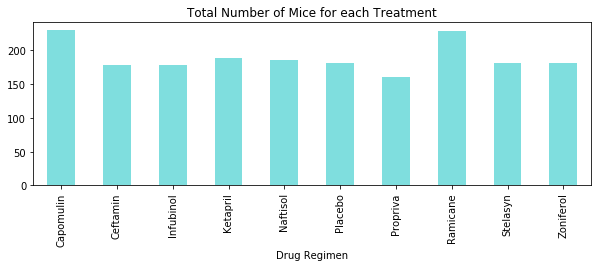

<Figure size 432x288 with 0 Axes>

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated = summary_statistics[['Count']]
mice_treated = mice_treated.rename(columns = {'Count': 'Total Number of Mice'})
mice_treated.plot(kind='bar', figsize=(10,3), color = 'c', alpha=0.5, align='center', legend=False)
plt.title("Total Number of Mice for each Treatment")
plt.show()
plt.tight_layout()

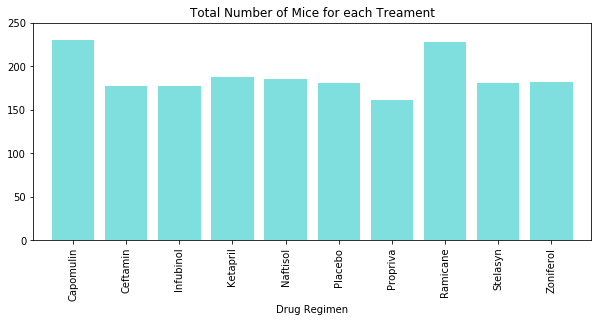

In [75]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_treated))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,4))
plt.bar(x_axis, mice_treated['Total Number of Mice'], color = 'c', alpha=0.5, align='center')
plt.xticks(tick_locations, mice_treated.index.values, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_treated['Total Number of Mice'])+20)
plt.title("Total Number of Mice for each Treament")
plt.xlabel("Drug Regimen")
plt.show()


In [157]:
# Calculate gender distribution of the cleaned data
female_group = clean_data.groupby(['Sex']).get_group(('Female'))
female_count = len(female_group['Mouse ID'].unique())
male_group = clean_data.groupby(['Sex']).get_group(('Male'))
male_count = len(male_group['Mouse ID'].unique())

gender = {'Gender Count':[female_count, male_count]}
gender_df = pd.DataFrame(gender, index=['Female', 'Male'])
gender_df

,Gender Count
Female,123
Male,125


<IPython.core.display.Javascript object>


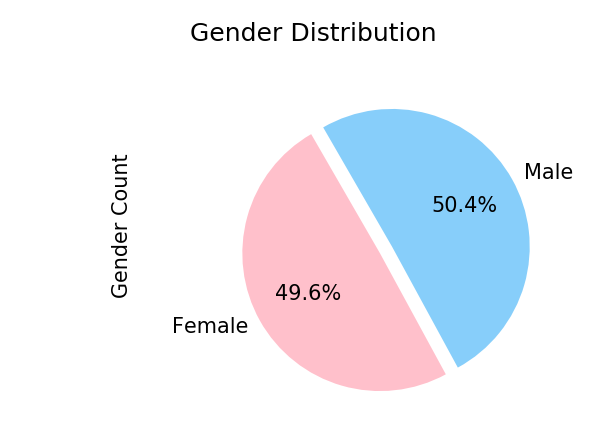

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
gender_df.plot(kind='pie', labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
               subplots=True, legend=False, explode=explode, colors=colors)
plt.title('Gender Distribution')
plt.show()

<IPython.core.display.Javascript object>


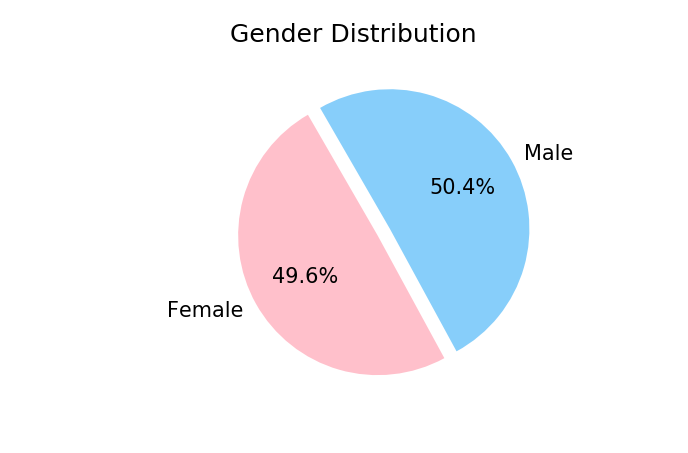

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plt.pie(gender_df['Gender Count'], labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
        explode=explode, colors=colors)
plt.title('Gender Distribution')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
